# Preliminary inspection of Tf-Idf embeddings
2022-11-14
______________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from tqdm import tqdm

In [6]:
# # Yuchen's directory structure

metadata_df = pd.read_csv('metadata.tsv', sep='\t') 
tfidf_df = pd.read_csv('transcript_embeddings_tfidf.csv')

In [7]:
metadata_df = metadata_df[metadata_df.episode_filename_prefix.isin(minilm_df.episode_id.values)]
metadata_df.reset_index(inplace=True, drop=True)
# metadata_df

In [8]:
fiction_embeddings_df = tfidf_df[tfidf_df.category=='fiction']

pca = PCA(n_components=2)
fiction_embeddings_pcs = pca.fit_transform(fiction_embeddings_df[fiction_embeddings_df.columns[4:]])

In [9]:
pca.explained_variance_ratio_

array([0.11701211, 0.04673184])

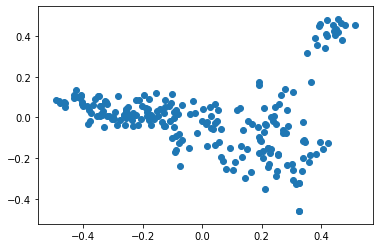

In [10]:
plt.scatter(fiction_embeddings_pcs[:,0],fiction_embeddings_pcs[:,1])

In [ ]:
fiction_embeddings_df

,Unnamed: 0,episode_id,show_id,category,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
427,427,6n1sHefqhXOGarTcQ2of1Z,show_02h1SKPgtH0WxWqvqJ7bcx,fiction,0.000000,0.000000,0.00000,0.000000,0.000000,0.017946,...,0.000000,0.000000,0.000000,0.000000,0.008475,0.000000,0.000000,0.000000,0.011154,0.000000
1523,1523,33ENspLdMcoBryc0z3ZkB9,show_08aevVzSkwp5nzmOKaf4ml,fiction,0.000000,0.000000,0.00000,0.039525,0.000000,0.000000,...,0.000000,0.024735,0.018370,0.042033,0.049915,0.000000,0.000000,0.000000,0.032847,0.000000
1524,1524,5r6RpxCeJE1Rora7npULWK,show_08aevVzSkwp5nzmOKaf4ml,fiction,0.000000,0.000000,0.00000,0.000000,0.031181,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.229481,0.000000,0.000000,0.000000,0.000000,0.000000
2107,2107,1x2vUn4N5pDTGDQbhCHxAy,show_0BhHKinkyoTOMiBWGNSJjK,fiction,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.005314,0.004434,0.009880,0.000000,0.076065,0.009444,0.012349,0.000000,0.020611,0.009340
2108,2108,368wxdIT6zjwGGuV9V7uOg,show_0BhHKinkyoTOMiBWGNSJjK,fiction,0.003372,0.004414,0.00000,0.003663,0.000000,0.000000,...,0.000000,0.004584,0.010214,0.000000,0.150328,0.013018,0.004255,0.004897,0.048701,0.033792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36158,36158,3TcbvOLupbYQQ55OuU70mv,show_2QqTj9ppNQejYl3aGhbDQR,fiction,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.075764,0.015231,0.000000,0.022916,0.014245,0.000000
38197,38197,5Kh7pGzOA23kNfoPLoPxRh,show_2VJdQsjBdHSewwRBQGq4pl,fiction,0.145402,0.000000,0.09188,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.049863,0.000000,0.000000,0.000000,0.000000,0.000000
38796,38796,6DIcXe2EokBN2gnZvkQ8bg,show_2xa2B8wxMD1TzOjqApglP3,fiction,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.052148,0.000000,0.000000,0.000000,0.021955,0.000000,0.000000,0.000000,0.028895,0.000000
38797,38797,54uxd7bZUy8mMGwebaYbr2,show_2xa2B8wxMD1TzOjqApglP3,fiction,0.043666,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.025220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
episode1 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[0]
episode2 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[1]
cosine_similarity(episode1.values.reshape(1,-1), episode2.values.reshape(1,-1))

array([[0.07942728]])

In [ ]:
episode3 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[2]
cosine_similarity(episode2.values.reshape(1,-1), episode3.values.reshape(1,-1))

array([[0.54358663]])

In [ ]:
episode4 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[3]
episode5 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[4]
cosine_similarity(episode4.values.reshape(1,-1), episode5.values.reshape(1,-1))

array([[0.78967691]])

In [ ]:
cosine_similarity(episode2.values.reshape(1,-1), episode4.values.reshape(1,-1))

array([[0.38203822]])

In [11]:
def get_cosine_sim(df, row1, row2):
    ep1 = df[df.columns[4:]].iloc[row1]
    ep2 = df[df.columns[4:]].iloc[row2]
    return cosine_similarity(ep1.values.reshape(1,-1), ep2.values.reshape(1,-1))

In [12]:
cosine_sims = np.zeros((len(fiction_embeddings_df), len(fiction_embeddings_df)))
for i in tqdm(range(len(fiction_embeddings_df))):
    for j in range(len(fiction_embeddings_df)):
        cosine_sims[i,j] = get_cosine_sim(fiction_embeddings_df, i, j)

100%|██████████| 222/222 [03:38<00:00,  1.02it/s]


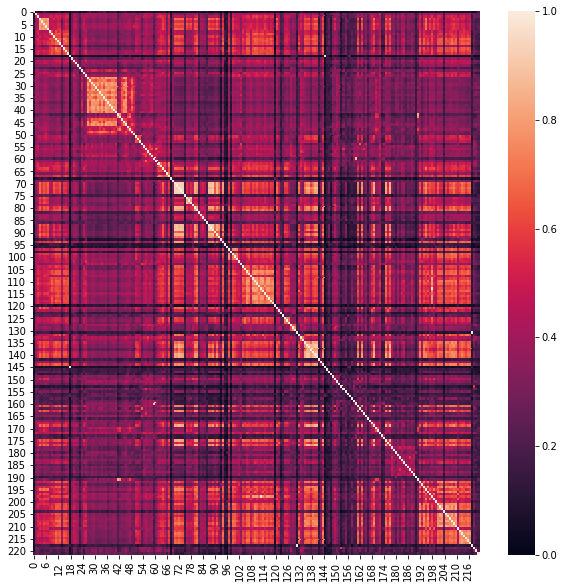

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(cosine_sims)
plt.show()

In [14]:
sample_size = 200
random_minilm_df = minilm_df.sample(sample_size, random_state=100)
random_cosine_sims = np.zeros((sample_size,sample_size))

for i in tqdm(range(len(random_minilm_df))):
    for j in range(len(random_minilm_df)):
        random_cosine_sims[i,j] = get_cosine_sim(random_minilm_df, i, j)

100%|██████████| 200/200 [01:43<00:00,  1.94it/s]


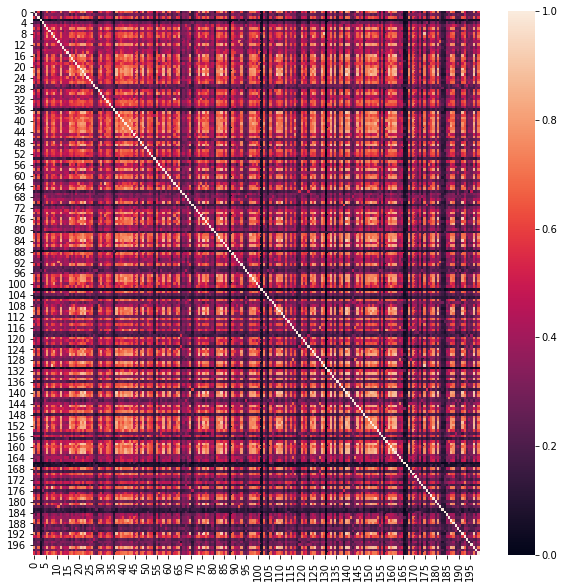

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(random_cosine_sims)
plt.show()

In [17]:
minilm_df.category.value_counts()

sports                       5038
health_and_fitness           4668
education                    4617
comedy                       3877
religion_and_spirituality    3526
business                     3106
society_and_culture          2779
leisure                      2270
arts                         1949
tv_and_film                  1928
kids_and_family              1914
music                        1087
history                       818
science                       655
technology                    600
true_crime                    468
fiction                       222
news                          203
government                     95
Name: category, dtype: int64

In [18]:
fiction_crime_df = minilm_df[minilm_df.category.isin(['true_crime','fiction'])]
fiction_crime_df = fiction_crime_df.sample(200)
fiction_crime_df.sort_values('category',inplace=True)

In [19]:
fiction_crime_cosine_sims = np.zeros((len(fiction_crime_df), len(fiction_crime_df)))
for i in tqdm(range(len(fiction_crime_df))):
    for j in range(len(fiction_crime_df)):
        fiction_crime_cosine_sims[i,j] = get_cosine_sim(fiction_crime_df, i, j)

100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


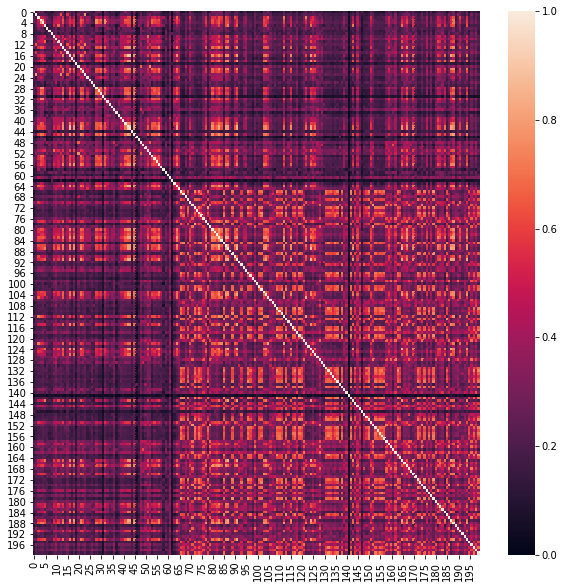

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(fiction_crime_cosine_sims)
plt.show()

## Pairwise comparisons 

Let's sample 50 transcripts from each of the categories and compare the pairwise similarities for same vs. different categories.

In [21]:
sample_size = 50
sampled_categories_df = minilm_df.groupby('category').apply(lambda x: x.sample(sample_size))

In [22]:
# within-category similarities
self_similarities = {}

for category in tqdm(sampled_categories_df.category.unique()):
    category_df = sampled_categories_df.loc[category]
    category_self_similarities = np.zeros((sample_size, sample_size))
    for i in range(len(category_df)):
        for j in range(len(category_df)):
            category_self_similarities[i,j] = get_cosine_sim(category_df, i, j)
    upper_tri_selfsims = np.triu(category_self_similarities, k=1)
    upper_tri_selfsims = upper_tri_selfsims[upper_tri_selfsims>0]
    self_similarities[category] = upper_tri_selfsims

100%|██████████| 19/19 [01:55<00:00,  6.10s/it]


In [23]:
import itertools

category_pair_selfsims = {}

for category_pair in itertools.combinations(sampled_categories_df.category.unique(), 2):
    paired_category_df = sampled_categories_df[sampled_categories_df.category.isin(category_pair)]
    category_pair_self_similarities = np.zeros((sample_size*2, sample_size*2))
    for i in tqdm(range(len(paired_category_df))):
        for j in range(len(paired_category_df)):
            category_pair_self_similarities[i,j] = get_cosine_sim(paired_category_df, i, j)
    category_pair_selfsims[category_pair] = category_pair_self_similarities

100%|██████████| 100/100 [00:24<00:00,  4.10it/s]


100%|██████████| 100/100 [00:23<00:00,  4.33it/s]


In [24]:
np.save('categorypair_sim_matrices.npy',category_pair_selfsims)

In [25]:
def get_selfsim_diffsim(sim_matrix_dict, category1, category2, sample_size):
    '''
    Takes in the similarity matrix of two different categories and returns the within-category and between-category similarities
    '''
    sim_matrix = sim_matrix_dict[category1, category2]
    
    triu_idx_selfsim = np.triu_indices(sample_size, k=1)
    triu_idx_diffsim = np.triu_indices(sample_size)
    
    cat1_selfsim = np.triu(sim_matrix[:sample_size, :sample_size], k=1)
    cat2_selfsim = np.triu(sim_matrix[sample_size:, sample_size:], k=1)
    
    cat1_selfsim = cat1_selfsim[triu_idx_selfsim]
    cat2_selfsim = cat2_selfsim[triu_idx_selfsim]
    
    cat1_cat2_diffsim = np.triu(sim_matrix[sample_size:, :sample_size])
    cat1_cat2_diffsim = cat1_cat2_diffsim[triu_idx_diffsim]
    
    return {category1:cat1_selfsim, category2:cat2_selfsim, (category1,category2):cat1_cat2_diffsim}

In [26]:
category_pair_selfsims['arts','business'][:50,:50]

array([[1.        , 0.16578787, 0.17319007, ..., 0.17057801, 0.1578763 ,
        0.13833213],
       [0.16578787, 1.        , 0.68376385, ..., 0.53631862, 0.50762284,
        0.61779336],
       [0.17319007, 0.68376385, 1.        , ..., 0.75415704, 0.64358845,
        0.82386713],
       ...,
       [0.17057801, 0.53631862, 0.75415704, ..., 1.        , 0.72270676,
        0.74212566],
       [0.1578763 , 0.50762284, 0.64358845, ..., 0.72270676, 1.        ,
        0.6301148 ],
       [0.13833213, 0.61779336, 0.82386713, ..., 0.74212566, 0.6301148 ,
        1.        ]])

In [32]:
from scipy.stats import ttest_ind

ttest_comparisons_tstat = np.zeros((len(sampled_categories_df.category.unique()), len(sampled_categories_df.category.unique())))
ttest_comparisons_pval = np.zeros((len(sampled_categories_df.category.unique()), len(sampled_categories_df.category.unique())))

for i, category1 in enumerate(sampled_categories_df.category.unique()): 
    for j, category2 in enumerate(sampled_categories_df.category.unique()):
        if i == j:
            ttest_comparisons_tstat[i,j] = 0
            ttest_comparisons_pval[i,j] = 1
        else:
            ordered_categories = tuple(sorted([category1, category2]))
            self_diff_sims = get_selfsim_diffsim(category_pair_selfsims, ordered_categories[0], ordered_categories[1], sample_size)
            ttest_result = ttest_ind(self_diff_sims[ordered_categories], self_diff_sims[category1], equal_var=False)# alternative='less')
            ttest_comparisons_tstat[i,j] = ttest_result.statistic
            ttest_comparisons_pval[i,j] = ttest_result.pvalue

In [33]:
colors_tstat = sns.color_palette('BuPu', 4)
levels_tstat = [-10,0,10]
cmap_tstat, norm_tstat = from_levels_and_colors(levels_tstat, colors_tstat, extend='both')

colors_pval = sns.color_palette('BuPu',3)
levels_pval = [0,0.05,1]
cmap_pval, norm_pval = from_levels_and_colors(levels_pval, colors_pval, extend='max')

In [34]:
ttest_comparisons_tstat.min()

-90.07901839858354

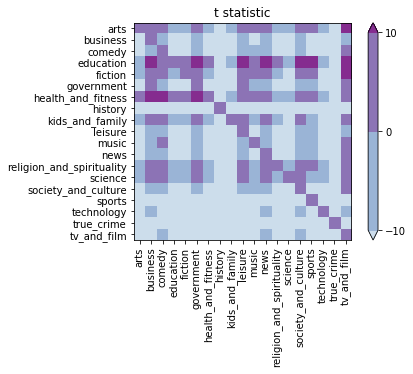

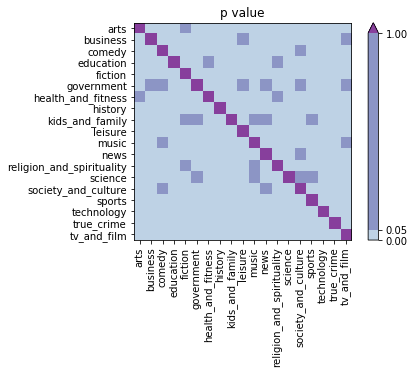

In [35]:
fig, ax = plt.subplots()
im = ax.imshow(ttest_comparisons_tstat, cmap=cmap_tstat, norm=norm_tstat)
ax.set_xticks(range(len(sampled_categories_df.category.unique())))
ax.set_xticklabels(sampled_categories_df.category.unique(), rotation=90)
ax.set_yticks(range(len(sampled_categories_df.category.unique())))
ax.set_yticklabels(sampled_categories_df.category.unique())
fig.colorbar(im,cmap=cmap_tstat, spacing='proportional')
plt.title('t statistic')
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(ttest_comparisons_pval, cmap=cmap_pval, norm=norm_pval)
plt.xticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique(), rotation=90)
plt.yticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique())
fig.colorbar(im, cmap=cmap_pval, spacing='proportional')
plt.title('p value')
plt.show()

In [36]:
print('Proportion of ordered category pairs where within-category cosine similarity > between-category cosine similarity:')
# print(f'{np.sum(ttest_comparisons_pval < .05)/ttest_comparisons_tstat.flatten().shape[0]:.3f}')

upper_tri_pvals = ttest_comparisons_pval[np.triu_indices(ttest_comparisons_pval.shape[0], k=1)].flatten()
lower_tri_pvals = ttest_comparisons_pval[np.tril_indices(ttest_comparisons_pval.shape[0], k=-1)].flatten()

np.sum(np.concatenate([upper_tri_pvals < .05, lower_tri_pvals < .05]))/np.concatenate([upper_tri_pvals < .05, lower_tri_pvals < .05]).shape[0]

Proportion of ordered category pairs where within-category cosine similarity > between-category cosine similarity:


0.9122807017543859